In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [3]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [4]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [5]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [6]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [7]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [8]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [9]:
# 그룹별로 NaN 값을 평균값으로 대체
result_df['AVG_오존'] = result_df.groupby(['SIDO', 'STD_YYYYMM'])['AVG_오존'].transform(lambda x: x.fillna(x.mean()))
# 필요한 경우, 여전히 NaN 값이 있는 경우에 대비해 전체 평균값으로 대체할 수도 있습니다
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean())
result_df.isna().sum()

SIDO          0
STD_YYYYMM    0
AVG_오존        0
오존_BAD        0
오존0.06_BAD    0
오존0.1_BAD     0
평균기온          0
평균최고기온        0
평균최저기온        0
평균증기압         0
dtype: int64

In [10]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2491,충청남도,202212,0.0218,N,N,N,-2.2,3.1,-6.9,3.8
2492,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2493,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2494,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2495,제주특별자치도,202212,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [11]:
# 'STD_YYYYMM'을 인덱스로 사용
result_df['STD_YYYYMM'] = pd.to_datetime(result_df['STD_YYYYMM'], format='%Y%m')
result_df = result_df.set_index('STD_YYYYMM')

In [12]:
result_df.tail(2)

,SIDO,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,,
2022-12-01,경상북도,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2022-12-01,제주특별자치도,0.0365,Y,N,N,6.8,9.8,4.0,6.6


In [13]:
# 원-핫 인코딩 수행
sido_one_hot = pd.get_dummies(result_df['SIDO'])

# 원-핫 인코딩된 데이터프레임을 원래의 데이터프레임에 병합
result_df = pd.concat([result_df, sido_one_hot], axis=1)

# 원래의 'SIDO' 열 삭제
result_df.drop('SIDO', axis=1, inplace=True)

In [14]:
result_df.head()

,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압,경기도,경상남도,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
STD_YYYYMM,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.011,N,N,N,-4.5,-0.7,-8.1,3.1,False,False,...,False,True,False,False,False,False,False,False,False,False
2010-01-01,0.021,N,N,N,3.0,7.7,-1.1,3.5,False,False,...,True,False,False,False,False,False,False,False,False,False
2010-01-01,0.014,N,N,N,0.0,5.0,-4.3,3.1,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-01,0.014,N,N,N,-3.9,-0.3,-7.4,3.4,False,False,...,False,False,False,False,True,False,False,False,False,False
2010-01-01,0.017,N,N,N,0.5,5.1,-3.3,4.5,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
result_df = result_df.loc[:, ~result_df.columns.str.contains('BAD')]


In [16]:
result_df.head(10)

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압,경기도,경상남도,경상북도,광주광역시,대구광역시,...,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
STD_YYYYMM,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.011000,-4.5,-0.7,-8.1,3.1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2010-01-01,0.021000,3.0,7.7,-1.1,3.5,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2010-01-01,0.014000,0.0,5.0,-4.3,3.1,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2010-01-01,0.014000,-3.9,-0.3,-7.4,3.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2010-01-01,0.017000,0.5,5.1,-3.3,4.5,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-01,0.011000,-2.7,2.5,-7.3,3.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2010-01-01,0.018000,1.5,7.4,-3.2,3.5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2010-01-01,0.028761,-1.3,3.7,-5.8,3.7,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2010-01-01,0.011100,-5.8,-0.1,-11.5,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
result_df.columns.value_counts()

AVG_오존     1
부산광역시      1
충청남도       1
제주특별자치도    1
전라북도       1
전라남도       1
인천광역시      1
울산광역시      1
세종특별자치시    1
서울특별시      1
대전광역시      1
평균기온       1
대구광역시      1
광주광역시      1
경상북도       1
경상남도       1
경기도        1
평균증기압      1
평균최저기온     1
평균최고기온     1
충청북도       1
Name: count, dtype: int64

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Epoch 1/30
63/63 [==============================] - 6s 25ms/step - loss: 0.2799 - val_loss: 0.1595
Epoch 2/30
63/63 [==============================] - 1s 14ms/step - loss: 0.1505 - val_loss: 0.1324
Epoch 3/30
63/63 [==============================] - 1s 13ms/step - loss: 0.1272 - val_loss: 0.1053
Epoch 4/30
63/63 [==============================] - 1s 11ms/step - loss: 0.1279 - val_loss: 0.1221
Epoch 5/30
63/63 [==============================] - 1s 12ms/step - loss: 0.1150 - val_loss: 0.1039
Epoch 6/30
63/63 [==============================] - 1s 13ms/step - loss: 0.1089 - val_loss: 0.0981
Epoch 7/30
63/63 [==============================] - 1s 12ms/step - loss: 0.1042 - val_loss: 0.0952
Epoch 8/30
63/63 [==============================] - 1s 12ms/step - loss: 0.1027 - val_loss: 0.1069
Epoch 9/30
63/63 [==============================] - 1s 11ms/step - loss: 0.0992 - val_loss: 0.0945
Epoch 10/30
63/63 [==============================] - 1s 11ms/step - loss: 0.0928 - val_loss: 0.1111
Epoch 11/

ValueError: x and y must have same first dimension, but have shapes (250,) and (236,)

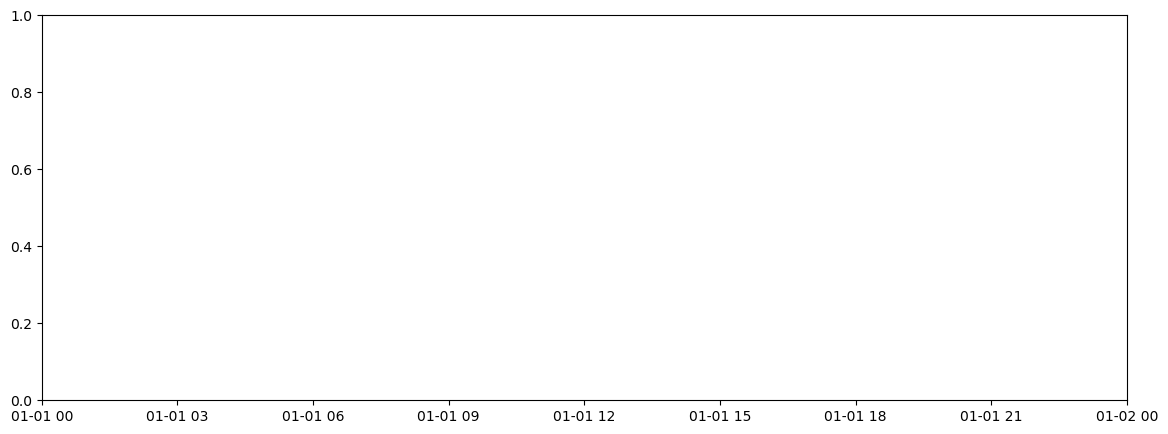

In [18]:
# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = result_df.values

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.9 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = result_df.index[:n_train]
test_dates = result_df.index[n_train:]

# 데이터셋 재구성
seq_len = 14  # 예: 과거 14일(또는 월) 데이터 사용
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]




In [ ]:
len(prediction_transformed), len(testY_transformed)

236

In [ ]:
print(f'prediction_transformed: {len(prediction_transformed)}, testY_transformed: {len(testY_transformed)}')

prediction_transformed: 236, testY_transformed: 236


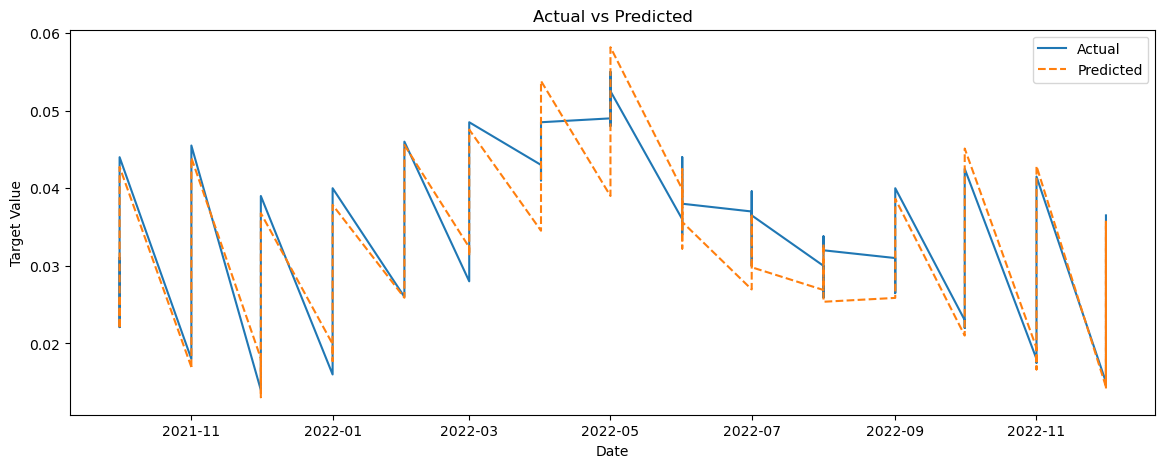

In [20]:
# 날짜 배열 조정
adjusted_test_dates = test_dates[seq_len:]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(adjusted_test_dates, testY_transformed, label='Actual')
plt.plot(adjusted_test_dates, prediction_transformed, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

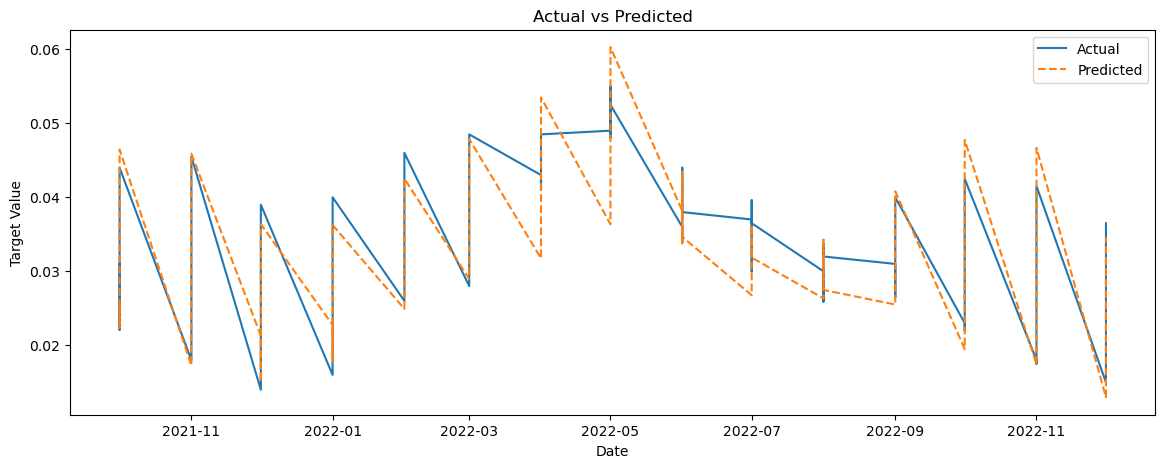

In [ ]:
# 날짜 배열 조정: 끝에서 236개 데이터 포인트 선택
adjusted_test_dates = test_dates[-236:]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(adjusted_test_dates, testY_transformed, label='Actual')
plt.plot(adjusted_test_dates, prediction_transformed, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


그래프에 나타난 점이 중복되어 보이는 경우, 몇 가지 가능한 원인이 있을 수 있습니다:

데이터 중복: 같은 날짜에 대해 두 개 이상의 데이터 포인트가 있을 수 있습니다. 이것은 데이터셋 내의 중복된 행이나 데이터의 집계 방식에 오류가 있을 때 발생할 수 있습니다.

데이터 포인트의 겹침: 예측값과 실제값이 유사하여 그래프 상에서 겹쳐 보일 수 있습니다. 만약 실제값과 예측값이 거의 일치한다면, 두 선이 겹쳐져서 한 선처럼 보이지 않고, 별도의 점으로 나타날 수 있습니다.

시각화 코드: 시각화 코드가 같은 날짜에 대해 여러 점을 그리도록 구현되었을 수 있습니다. 예를 들어, plt.plot() 함수에 같은 날짜가 여러 번 나타날 경우 이런 현상이 발생할 수 있습니다.

데이터 전처리 오류: 데이터 전처리 과정에서 예측값이나 실제값 배열을 생성할 때 어떤 실수로 인해 데이터가 잘못된 위치에 할당되었을 수도 있습니다.

이 현상을 정확히 파악하려면 데이터와 시각화 코드를 자세히 검토할 필요가 있습니다. 일단 데이터프레임에 중복된 날짜가 있는지 확인하고, 이를 제거하는 것이 좋습니다. 중복을 확인하려면 다음과 같은 코드를 사용할 수 있습니다:

In [21]:
# 날짜별로 데이터가 중복되었는지 확인
duplicates = result_df.index.duplicated()
print("Number of duplicates in the index: ", duplicates.sum())

Number of duplicates in the index:  2340
